In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn. model_selection import RandomizedSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier



from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, roc_curve, roc_auc_score, auc

%matplotlib inline

In [2]:
df_nba = pd.read_csv('nba_all_season.csv')
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 24 columns):
Unnamed: 0           11145 non-null int64
Unnamed: 0.1         11145 non-null int64
player_name          11145 non-null object
team_abbreviation    11145 non-null object
age                  11145 non-null float64
player_height        11145 non-null float64
player_weight        11145 non-null float64
college              11145 non-null object
country              11145 non-null object
draft_year           11145 non-null object
draft_round          11145 non-null object
draft_number         11145 non-null object
gp                   11145 non-null int64
pts                  11145 non-null float64
reb                  11145 non-null float64
ast                  11145 non-null float64
net_rating           11145 non-null float64
oreb_pct             11145 non-null float64
dreb_pct             11145 non-null float64
usg_pct              11145 non-null float64
ts_pct               111

In [3]:
df_nba.describe()

,Unnamed: 0,Unnamed: 0.1,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,best_player
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,5572.000000,5572.000000,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078,0.020099
std,3217.428709,3217.428709,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017,0.140344
min,0.000000,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2786.000000,2786.000000,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000,0.000000
50%,5572.000000,5572.000000,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000,0.000000
75%,8358.000000,8358.000000,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000,0.000000
max,11144.000000,11144.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000,1.000000


In [4]:
df_nba.isnull().sum()

Unnamed: 0           0
Unnamed: 0.1         0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
best_player          0
dtype: int64

In [5]:
df_nba.shape

(11145, 24)

In [6]:
df_nba.drop(['Unnamed: 0','Unnamed: 0.1','team_abbreviation','college','country','season'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.18901319 0.06165322 0.15834841 0.04120821 0.08129789 0.08223694
 0.09888112 0.04274566 0.04016618 0.05581116 0.05071778 0.03563176
 0.06228847]


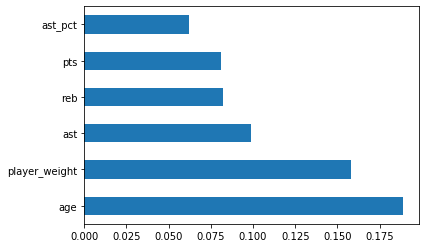

In [7]:
num_col = df_nba.loc[:, df_nba.dtypes != np.object]
num_col.describe().T
X = num_col.drop('best_player', axis = 1)
Y = num_col['best_player'] 
# Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)

print(model.feature_importances_)

df_importances = pd.Series(model.feature_importances_, index = X.columns)
df_importances.nlargest(6).plot.barh()
plt.show()


In [8]:

df_new = df_nba[['player_name', 'age', 'player_height', 'player_weight', 'pts', 'reb']]
df_new['target'] = df_nba.apply(lambda x: 1 if (x['age']<=25) & (x['player_height']>=180) & (x['player_weight']<=90) & (x['pts']>=6) & (x['reb']>=3) else 0, axis=1)
# df.shape
df_new

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,player_name,age,player_height,player_weight,pts,reb,target
0,Dennis Rodman,36.0,198.12,99.790240,5.7,16.1,0
1,Dwayne Schintzius,28.0,215.90,117.933920,2.3,1.5,0
2,Earl Cureton,39.0,205.74,95.254320,0.8,1.0,0
3,Ed O'Bannon,24.0,203.20,100.697424,3.7,2.3,0
4,Ed Pinckney,34.0,205.74,108.862080,2.4,2.4,0
...,...,...,...,...,...,...,...
11140,Maxi Kleber,28.0,208.28,108.862080,9.1,5.4,0
11141,Melvin Frazier Jr.,23.0,195.58,97.522280,1.2,0.3,0
11142,Meyers Leonard,28.0,213.36,117.933920,6.1,5.1,0
11143,Norvel Pelle,27.0,208.28,104.779752,2.1,3.0,0


In [9]:
df_new.isnull().sum()

player_name      0
age              0
player_height    0
player_weight    0
pts              0
reb              0
target           0
dtype: int64

In [10]:
df_new.groupby('target').count()['player_name']

target
0    10910
1      235
Name: player_name, dtype: int64

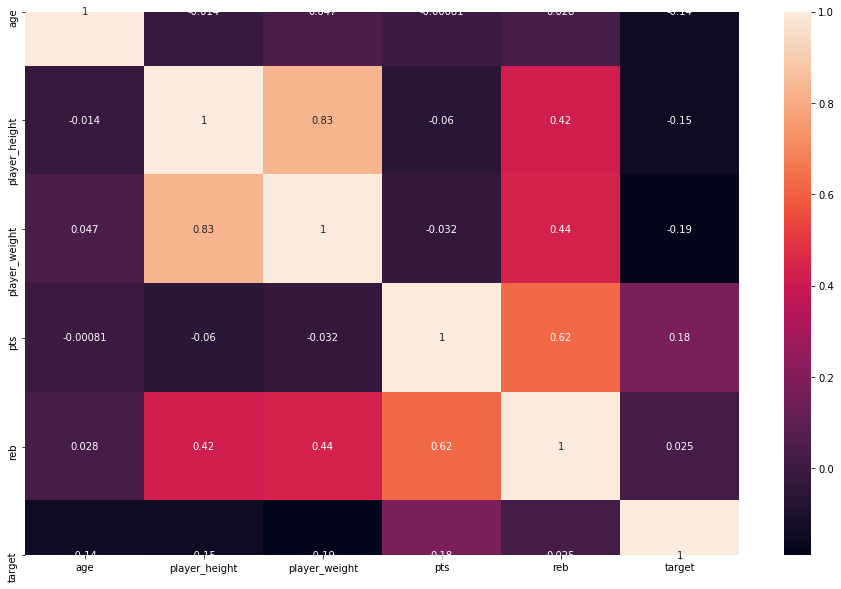

In [11]:

plt.figure(figsize=(16,10))
sns.heatmap(df_new.corr(), annot=True)

## Feature selection dan standardisasi¶

In [12]:
standardize = StandardScaler()
standardize.fit(df_new[['age','player_height','player_weight','pts','reb']])

df_standar = standardize.transform(df_new[['age','player_height','player_weight','pts','reb']])
df_standar = pd.DataFrame(df_standar, columns= ['age','player_height','player_weight','pts','reb'])
df_standar['target'] = df_new['target']
df_standar

,age,player_height,player_weight,pts,reb,target
0,2.033006,-0.292998,-0.067402,-0.408829,5.025470,0
1,0.191372,1.641595,1.375352,-0.981681,-0.825572,0
2,2.723619,0.536113,-0.428090,-1.234410,-1.025951,0
3,-0.729445,0.259743,0.004736,-0.745801,-0.504967,0
4,1.572598,0.536113,0.653975,-0.964832,-0.464892,0
...,...,...,...,...,...,...
11140,0.191372,0.812484,0.653975,0.164023,0.737377,0
11141,-0.959649,-0.569369,-0.247746,-1.167015,-1.306480,0
11142,0.191372,1.365225,1.375352,-0.341434,0.617150,0
11143,-0.038832,0.812484,0.329355,-1.015378,-0.224438,0


In [13]:
df_ibl=pd.read_csv('ibl_player.csv')
df_ibl

,Unnamed: 0,name,club,country,age,height,weight,pts,reb,gp,draft_year,draft_round,draft_number,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,Andakara Prastawa Dyaksa,Pelita Jaya Bakrie,Indonesia,24,190,90,7,6,55,2017,2,10,2.3,-0.3,0.080,0.087,0.091,0.327,0.237
1,1,Reggie Mononimbar,Pelita Jaya Bakrie,Indonesia,21,185,86,6,3,15,2018,3,20,2.3,1.2,0.054,0.077,0.087,0.415,0.277
2,2,Hardianus Lakudu,Satria Muda Pertamina Jakarta,Indonesia,23,178,83,10,3,64,2019,1,35,1.3,2.4,0.480,0.102,0.122,0.502,0.352
3,3,Kevin Yonas Sitorus,Satria Muda Pertamina Jakarta,Indonesia,26,185,75,11,4,27,2018,5,8,2.2,10.4,0.650,0.092,0.192,0.592,0.071
4,4,Arki Dikania Wisnu,Satria Muda Pertamina Jakarta,Indonesia,20,183,80,5,2,15,2017,3,10,1.8,12.0,0.010,0.103,0.133,0.322,0.143
5,5,Laurentius Steven Oei,Satria Muda Pertamina Jakarta,Indonesia,21,191,85,4,10,49,2018,4,23,2.5,9.0,0.120,0.118,0.118,0.303,0.238
6,6,Mei Joni,Stapac,Indonesia,25,188,90,7,5,20,2015,6,10,2.2,9.4,0.055,0.086,0.186,0.386,0.226
7,7,Vincent Rivaldi Kosasih,Stapac,Indonesia,23,179,87,1,2,31,2018,5,11,1.2,8.4,0.018,0.129,0.029,0.429,0.189
8,8,Hardian Wicaksono,Pacific Caesar Surabaya,Indonesia,21,177,80,9,8,24,2018,2,24,1.4,13.1,0.065,0.110,0.045,0.410,0.220
9,9,Brandon Jawato,Louvre Surabaya,Indonesia,24,182,85,6,5,36,2017,8,25,1.7,12.5,0.053,0.137,0.125,0.537,0.237


In [14]:
df_ibl.shape

(10, 20)

## Splitting data

In [15]:
X = df_standar.iloc[:, :-1]
y = df_standar[['target']]

x_tr, x_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.18, random_state=42)
print("train\t\t" , "test")
print(x_tr.shape, "\t", x_ts.shape)
print(y_tr.shape, "\t", y_ts.shape)

train		 test
(9138, 5) 	 (2007, 5)
(9138, 1) 	 (2007, 1)


## Random Forest

In [17]:
rfModel = RandomForestClassifier(n_estimators=100)
rfModel.fit(x_tr,y_tr)
# len(rfModel.estimators_) #ada 100 estimators
# rfModel_predictions = rfModel.predict(xts)
# rfModel_predictions

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
rfModel.score(x_ts, y_ts)

1.0

## Logistic Regression

In [19]:

logreg = LogisticRegression()
logreg.fit(x_tr, y_tr)
# logreg_predictions = logreg.predict(xts)
# logreg_predictions

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
logreg.score(x_ts,y_ts)

0.9805680119581465

## KNN

In [21]:
k = round(x_tr.shape[0] ** .5) + 1 
k
knnmodel = KNeighborsClassifier(n_neighbors=k)
knnmodel.fit(x_tr,y_tr)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=97, p=2,
                     weights='uniform')

In [22]:
knnmodel.score(x_ts, y_ts)

0.9830592924763328

In [23]:
print('Score: ')
print('Logistic Regression Score = {} \nRandom Forest Score = {} \nKNN Score = {} '
      .format(logreg.score(x_ts,y_ts),rfModel.score(x_ts,y_ts), knnmodel.score(x_ts,y_ts)))

Score: 
Logistic Regression Score = 0.9805680119581465 
Random Forest Score = 1.0 
KNN Score = 0.9830592924763328 


In [24]:
rfModel_score = np.mean(cross_val_score(logreg,X,y, cv=5))
logreg_score = np.mean(cross_val_score(rfModel, X, y, cv=5))
knnmodel_score = np.mean(cross_val_score(knnmodel, X, y, cv=5))

print('Logistic Regression Score = {} \nRandom Forest Score = {} \nKNN Score = {} '
      .format(rfModel_score, logreg_score, knnmodel_score))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

Logistic Regression Score = 0.9816958277254374 
Random Forest Score = 0.999192462987887 
KNN Score = 0.9856437864513236 


In [25]:
## Hyperparameter tuning Logistic regression


penalty = ['l1','l2','elasticnet','none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

param = {
    'penalty':penalty, 'solver':solver, 'max_iter':max_iter
}
param

# logreg.get_params()

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

In [26]:
model = LogisticRegression()
modelrs = RandomizedSearchCV(
    estimator = model, param_distributions = param, cv = 5 )

In [27]:
modelrs.fit(x_tr,y_tr)
modelrs.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: penalty='none' is not supported for the liblinear solver

In [28]:
modellogreg = LogisticRegression(
    solver='lbfgs', penalty='l2', max_iter=10
)
modellogreg.fit(x_tr,y_tr)
modellogreg.score(x_ts, y_ts)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9810662680617838

In [29]:
model = RandomForestClassifier()
#hyper parameters set
param = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
modelrs = RandomizedSearchCV(
    estimator = model, param_distributions = param, cv = 5 
)

In [30]:
modelrs.fit(x_tr,y_tr)
modelrs.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

{'random_state': 123,
 'n_jobs': -1,
 'n_estimators': 10,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'criterion': 'entropy'}

In [31]:
modelrf = RandomForestClassifier(
    random_state=123, n_jobs=-1, n_estimators=15, min_samples_split=7,min_samples_leaf=1,criterion='entropy'
)
modelrf.fit(x_tr,y_tr)
modelrf.score(x_ts, y_ts)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


1.0

In [32]:

model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
param = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
modelrs = RandomizedSearchCV(
    estimator = model, param_distributions = param, cv = 5 
)

In [33]:

modelrs.fit(x_tr,y_tr)
modelrs.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y

{'weights': 'distance',
 'n_neighbors': 8,
 'n_jobs': -1,
 'leaf_size': 3,
 'algorithm': 'auto'}

In [34]:

modelknn = KNeighborsClassifier(
    weights='distance', n_neighbors=7,n_jobs=-1,leaf_size=2,algorithm='kd_tree'
)
modelknn.fit(x_tr,y_tr)
modelknn.score(x_ts, y_ts)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.9915296462381664

In [36]:
print('Score after Hyper-Parameter Tuning :')
print('Logistic Regression Score = {} \nRandom Forest Score = {} \nKNN Score = {} '
      .format(modellogreg.score(x_ts,y_ts), modelrf.score(x_ts,y_ts), modelknn.score(x_ts,y_ts)))

Score after Hyper-Parameter Tuning :
Logistic Regression Score = 0.9810662680617838 
Random Forest Score = 1.0 
KNN Score = 0.9915296462381664 


## Metrics Evaluation

In [38]:
from sklearn import metrics
y_true = y_ts
y_pred_LG = modellogreg.predict(x_ts)
y_pred_KNN = modelknn.predict(x_ts)
y_pred_RF = modelrf.predict(x_ts)

bacc = list(map(lambda y_true, y_pred : metrics.balanced_accuracy_score(y_true, y_pred), [y_true, y_true, y_true], [y_pred_LG, y_pred_KNN, y_pred_RF]))
precision = list(map(lambda y_true, y_pred : metrics.precision_score(y_true, y_pred), [y_true, y_true, y_true], [y_pred_LG, y_pred_KNN, y_pred_RF]))
recall = list(map(lambda y_true, y_pred : metrics.recall_score(y_true, y_pred), [y_true, y_true, y_true], [y_pred_LG, y_pred_KNN, y_pred_RF]))
f1score = list(map(lambda y_true, y_pred : metrics.f1_score(y_true, y_pred), [y_true, y_true, y_true], [y_pred_LG, y_pred_KNN, y_pred_RF]))
roc_auc = list(map(lambda y_true, y_pred : metrics.roc_auc_score(y_true, y_pred), [y_true, y_true, y_true], [y_pred_LG, y_pred_KNN, y_pred_RF]))

df_metrics = pd.DataFrame(
    {
        'bacc' : bacc,
        'precision' : precision,
        'recall' : recall,
        'f1score' : f1score,
        'roc_auc' : roc_auc
    }
    , index = ['LogReg', 'KNN', 'RandomForest']
)
df_metrics

,bacc,precision,recall,f1score,roc_auc
LogReg,0.598475,0.571429,0.200,0.296296,0.598475
KNN,0.836483,0.870968,0.675,0.760563,0.836483
RandomForest,1.000000,1.000000,1.000,1.000000,1.000000


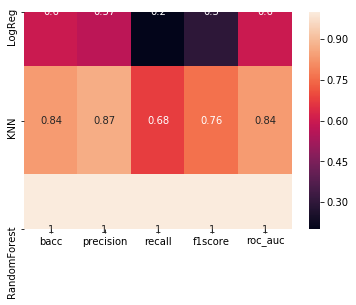

In [39]:
sns.heatmap(df_metrics, annot=True) 

## Using "BEST MODEL" for Predicting Real Data

In [40]:
dftes = pd.read_csv('ibl_player.csv', delimiter=',')
dftes

,Unnamed: 0,name,club,country,age,height,weight,pts,reb,gp,draft_year,draft_round,draft_number,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,Andakara Prastawa Dyaksa,Pelita Jaya Bakrie,Indonesia,24,190,90,7,6,55,2017,2,10,2.3,-0.3,0.080,0.087,0.091,0.327,0.237
1,1,Reggie Mononimbar,Pelita Jaya Bakrie,Indonesia,21,185,86,6,3,15,2018,3,20,2.3,1.2,0.054,0.077,0.087,0.415,0.277
2,2,Hardianus Lakudu,Satria Muda Pertamina Jakarta,Indonesia,23,178,83,10,3,64,2019,1,35,1.3,2.4,0.480,0.102,0.122,0.502,0.352
3,3,Kevin Yonas Sitorus,Satria Muda Pertamina Jakarta,Indonesia,26,185,75,11,4,27,2018,5,8,2.2,10.4,0.650,0.092,0.192,0.592,0.071
4,4,Arki Dikania Wisnu,Satria Muda Pertamina Jakarta,Indonesia,20,183,80,5,2,15,2017,3,10,1.8,12.0,0.010,0.103,0.133,0.322,0.143
5,5,Laurentius Steven Oei,Satria Muda Pertamina Jakarta,Indonesia,21,191,85,4,10,49,2018,4,23,2.5,9.0,0.120,0.118,0.118,0.303,0.238
6,6,Mei Joni,Stapac,Indonesia,25,188,90,7,5,20,2015,6,10,2.2,9.4,0.055,0.086,0.186,0.386,0.226
7,7,Vincent Rivaldi Kosasih,Stapac,Indonesia,23,179,87,1,2,31,2018,5,11,1.2,8.4,0.018,0.129,0.029,0.429,0.189
8,8,Hardian Wicaksono,Pacific Caesar Surabaya,Indonesia,21,177,80,9,8,24,2018,2,24,1.4,13.1,0.065,0.110,0.045,0.410,0.220
9,9,Brandon Jawato,Louvre Surabaya,Indonesia,24,182,85,6,5,36,2017,8,25,1.7,12.5,0.053,0.137,0.125,0.537,0.237


In [41]:

dftest = dftest[[' Age',' Height', ' Weight', ' Avg Points', ' Avg Rebounds']]

stdscalertest = StandardScaler()

datastdtest = stdscalertest.fit_transform(dftest)
datastdtest

NameError: name 'dftest' is not defined

In [42]:

y_KNN = knnmodel.predict(X_)


dftes['prediksi KNN'] = y_KNN
dftes

NameError: name 'X_' is not defined

In [ ]:
##fix remed sajahh... saya nda ngerti soal ujiannya